In [6]:
import os
import pandas as pd
import networkx as nx
import json
import dowhy
import random
import numpy as np
import re
import utils

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = utils.extract_CD_graph("graph_1603") #Loads the graph from json

In [3]:
graph.edges()

OutEdgeView([('black', 'married'), ('black', 're78'), ('black', 're74'), ('black', 'education'), ('black', 'treatment'), ('hispanic', 'married'), ('hispanic', 'education'), ('hispanic', 're78'), ('hispanic', 're74'), ('age', 'married'), ('age', 'education'), ('age', 're78'), ('age', 're74'), ('age', 'treatment'), ('treatment', 're78'), ('married', 'treatment'), ('education', 'married'), ('education', 'nodegree'), ('education', 're78'), ('education', 're74'), ('education', 'treatment'), ('nodegree', 'married'), ('nodegree', 're78'), ('nodegree', 're74'), ('nodegree', 'treatment'), ('re74', 'treatment')])

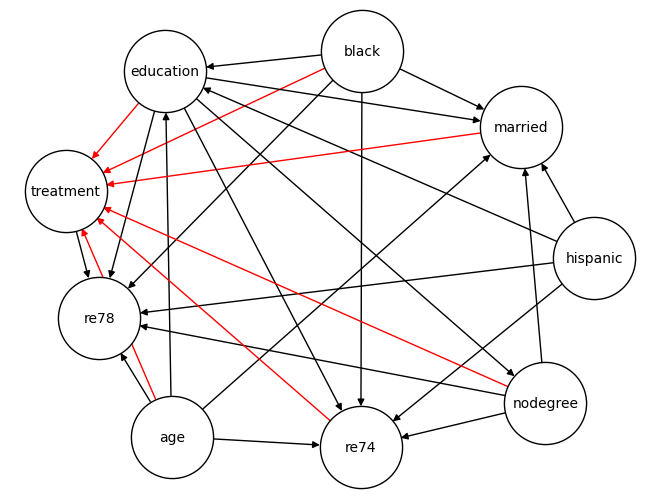

In [4]:


col_list = [("black", "treatment"), ("married","treatment"), ("nodegree","treatment"), ("re74","treatment"), ("age","treatment"), ("education","treatment")]

pos = nx.spring_layout(graph, k=100, seed=42) # Seed to make it deterministic
colors = ['red'  if (x,y) in col_list else 'black' for (x,y) in graph.edges()]
nx.draw(graph, with_labels=True, node_size=3500, node_color='w', font_size=10, edgecolors ='black', pos=pos, edge_color=colors)
plt.savefig("./EDA_graphs/augmented_graph.png", dpi=600)
plt.show()

In [15]:
graph = utils.extract_CD_graph("Forced")

graph.remove_edge("married", "treatment")
graph.remove_edge("nodegree", "treatment")
graph.remove_edge("re75", "treatment")

graph = nx.relabel_nodes(graph, {'re75': 're74'})

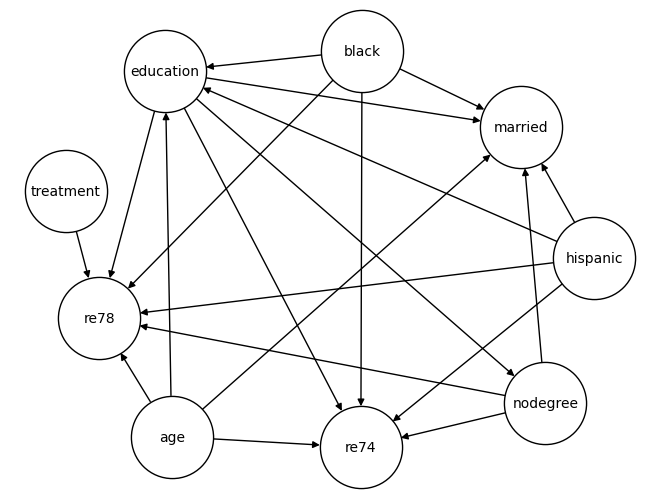

In [16]:
pos = nx.spring_layout(graph, k=100, seed=42) # Seed to make it deterministic
nx.draw(graph, with_labels=True, node_size=3500, node_color='w', font_size=10, edgecolors ='black', pos=pos)
plt.savefig("./EDA_graphs/domain_knowledge_graph.png", dpi=600)
plt.show()

In [13]:
utils.graph_to_json(graph, "domain_knowledge")

'Graph saved at ./causal_discovery_graphs\\domain_knowledge.json'

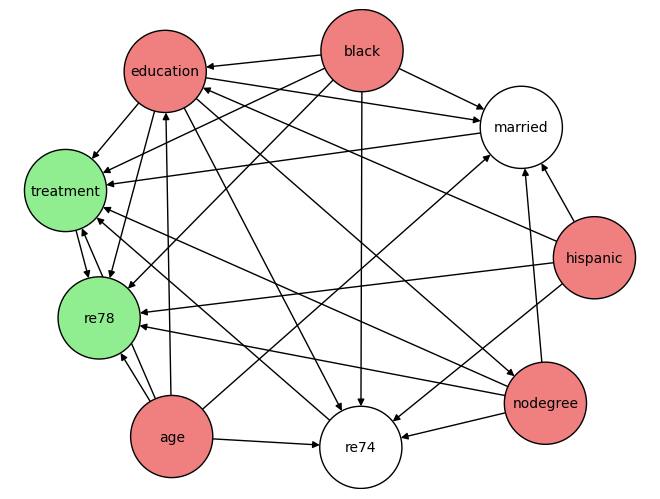

In [23]:
graph = utils.extract_CD_graph("graph_1603") 

color = []
for node in graph.nodes():
    if node in ["nodegree", "black", "hispanic", "education", "age"]:
        color.append('lightcoral')
    elif node in ["treatment", "re78"]:
        color.append('lightgreen')
    else:
        color.append("w")

pos = nx.spring_layout(graph, k=100, seed=42) 
nx.draw(graph, 
        with_labels=True, 
        node_color=color,
        node_size=3500,  
        font_size=10, 
        edgecolors ='black', 
        pos=pos)

plt.savefig("./EDA_graphs/backdoor_criterion_plot.png", dpi=600)
plt.show()

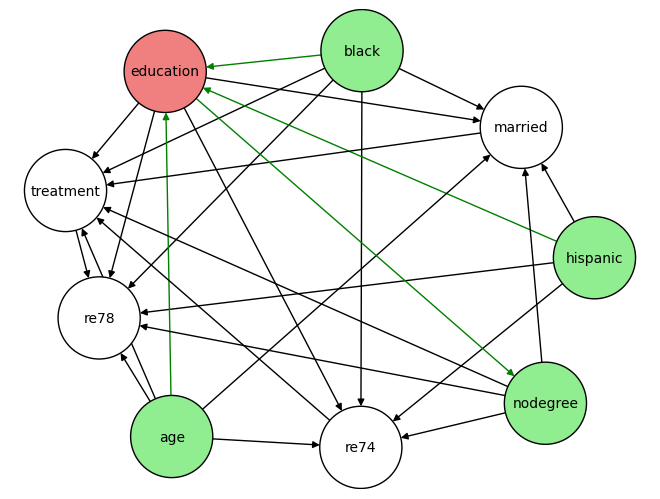

In [25]:
graph = utils.extract_CD_graph("graph_1603") 

col_list = [("black", "education"), ("age","education"), ("hispanic","education"), ("education","nodegree")]
edge_col = ['green'  if (x,y) in col_list else 'black' for (x,y) in graph.edges()]


color = []
for node in graph.nodes():
    if node in ["education"]:
        color.append('lightcoral')
    elif node in ["black", "hispanic", "age", "nodegree"]:
        color.append('lightgreen')
    else:
        color.append("w")

pos = nx.spring_layout(graph, k=100, seed=42) 
nx.draw(graph, 
        with_labels=True, 
        node_color=color,
        node_size=3500,  
        font_size=10, 
        edge_color = edge_col, 
        edgecolors = "black",
        pos=pos)

plt.savefig("./EDA_graphs/frontdoor_criterion_plot.png", dpi=600)
plt.show()

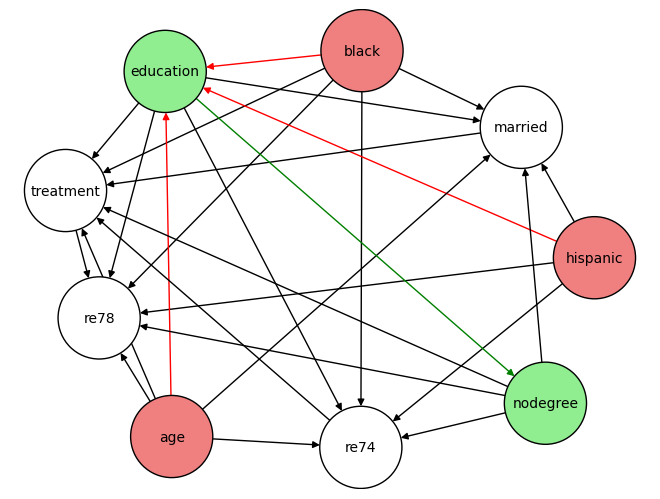

In [32]:
#	education	nodegree	[age, hispanic, black]

graph = utils.extract_CD_graph("graph_1603") 

col_list = [("black", "education"), ("age","education"), ("hispanic","education")]
edge_col = ['red'  if (x,y) in col_list else 'green' if (x, y) in [("education", "nodegree")] else 'black' for (x,y) in graph.edges()]


color = []
for node in graph.nodes():
    if node in ["age", "hispanic", "black"]:
        color.append('lightcoral')
    elif node in ["education", "nodegree"]:
        color.append('lightgreen')
    else:
        color.append("w")

pos = nx.spring_layout(graph, k=100, seed=42) 
nx.draw(graph, 
        with_labels=True, 
        node_color=color,
        node_size=3500,  
        font_size=10, 
        edge_color = edge_col, 
        edgecolors = "black",
        pos=pos)

plt.savefig("./EDA_graphs/iv_criterion_plot.png", dpi=600)
plt.show()